In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import imblearn

In [5]:
df = pd.read_csv('Heart_Disease.csv')

In [6]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Droping Null values

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Visualising Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001641EDA7588>,
      dtype=object)

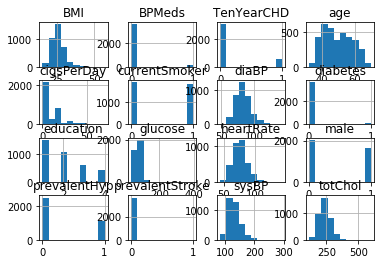

In [9]:
df.hist()

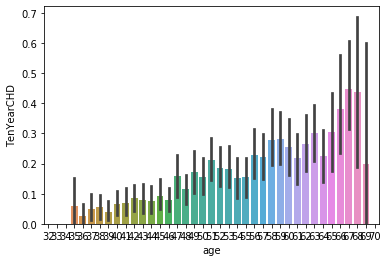

In [10]:
sns.barplot(x='age',y='TenYearCHD',data=df)

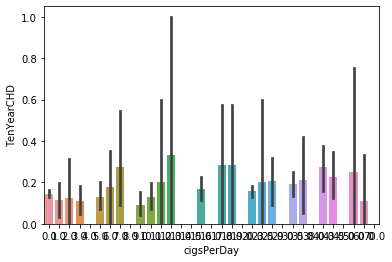

In [11]:
sns.barplot(x=df['cigsPerDay'],y=df['TenYearCHD'],data=df)

# Spliting Target variable

In [12]:
X = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']

# Spliting training and testing dataset

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 105)

# Checking data imbalance

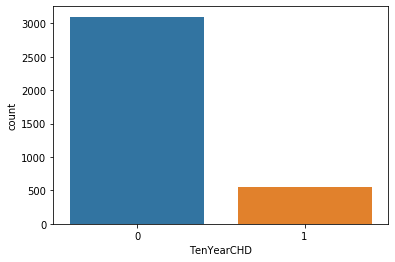

In [14]:
sns.countplot(df['TenYearCHD'])

### Data is very unbalanced

### So we need to Oversample and undersample the data

# Oversampling the Data

### Before Oversampling

In [15]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

Before OverSampling, counts of label '1': 377
Before OverSampling, counts of label '0': 2183 



# using SMOTE for Oversampling 

In [16]:
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

### After Oversampling

In [17]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (4366, 15)
After OverSampling, the shape of train_y: (4366,) 

After OverSampling, counts of label '1': 2183
After OverSampling, counts of label '0': 2183


# Implementing Random Forest model

In [18]:
from sklearn.ensemble import RandomForestClassifier
my_model = RandomForestClassifier(n_estimators=50,criterion='entropy',random_state= 105) 
result = my_model.fit(X_train_res, y_train_res) 

In [19]:
predictions = my_model.predict(X_test)
predictions

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

# Classification Report

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       918
           1       0.40      0.23      0.29       180

    accuracy                           0.82      1098
   macro avg       0.63      0.58      0.59      1098
weighted avg       0.78      0.82      0.80      1098



# Confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(predictions,y_test)
confusion_df = pd.DataFrame(confusion_mat,index=['Actual 1','Actual 0'],columns=['Predicted 1','Predicted 0'])
confusion_df

,Predicted 1,Predicted 0
Actual 1,854,138
Actual 0,64,42


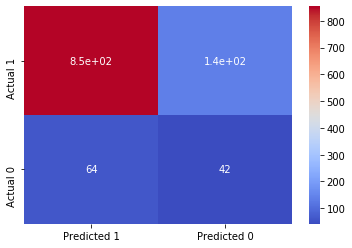

In [22]:
sns.heatmap(confusion_df,cmap='coolwarm',annot=True)

# Accuracy Score

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predictions)*100

81.60291438979964

# F1 Score

In [24]:
from sklearn.metrics import f1_score

f1_score(y_test,predictions)*100

29.370629370629374

# Deploying Model

In [25]:
new_predictions = my_model.predict([[1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0]])
new_predictions

array([0], dtype=int64)

In [26]:
new_pred2 = my_model.predict([[1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0]])
new_pred2

array([1], dtype=int64)